In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
#Loading the valuations csv;
valuations = pd.read_csv("csvs/player_valuations.csv")

In [3]:
#Loading the players csv;
players =pd.read_csv("csvs/players.csv")

In [4]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30298 entries, 0 to 30297
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   player_id                             30298 non-null  int64  
 1   first_name                            28334 non-null  object 
 2   last_name                             30298 non-null  object 
 3   name                                  30298 non-null  object 
 4   last_season                           30298 non-null  int64  
 5   current_club_id                       30298 non-null  int64  
 6   player_code                           30298 non-null  object 
 7   country_of_birth                      27607 non-null  object 
 8   city_of_birth                         28093 non-null  object 
 9   country_of_citizenship                29754 non-null  object 
 10  date_of_birth                         30251 non-null  object 
 11  sub_position   

This dataset has a lot of null values in a few places. We will have to investigate further.
We'll also have to look for duplicates.

In [5]:
players.describe()

,player_id,last_season,current_club_id,height_in_cm,market_value_in_eur,highest_market_value_in_eur
count,3.029800e+04,30298.000000,30298.000000,28188.000000,1.935800e+04,2.895500e+04
mean,3.112298e+05,2018.768335,4365.629547,182.233113,2.180419e+06,3.523106e+06
std,2.502184e+05,3.654054,10056.593385,6.834130,7.096501e+06,9.217968e+06
min,1.000000e+01,2012.000000,3.000000,18.000000,1.000000e+04,1.000000e+04
25%,9.526825e+04,2016.000000,403.000000,178.000000,1.750000e+05,2.500000e+05
50%,2.578240e+05,2019.000000,1071.000000,182.000000,3.500000e+05,7.500000e+05
75%,4.655408e+05,2022.000000,3008.000000,187.000000,1.000000e+06,2.600000e+06
max,1.186012e+06,2023.000000,83678.000000,207.000000,1.800000e+08,2.000000e+08


In [6]:
appearances=pd.read_csv("csvs/appearances.csv")

In [7]:
gameevents = pd.read_csv("csvs/game_events.csv")

I"ve loaded in most of the csv files I"ll be using for my dataset. 

In [8]:
valuations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440663 entries, 0 to 440662
Data columns (total 9 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   player_id                            440663 non-null  int64 
 1   last_season                          440663 non-null  int64 
 2   datetime                             440663 non-null  object
 3   date                                 440663 non-null  object
 4   dateweek                             440663 non-null  object
 5   market_value_in_eur                  440663 non-null  int64 
 6   n                                    440663 non-null  int64 
 7   current_club_id                      440663 non-null  int64 
 8   player_club_domestic_competition_id  440663 non-null  object
dtypes: int64(5), object(4)
memory usage: 30.3+ MB


The valuations dataframe doesnt seem to have any null values which is good. But we will still have to check for duplicates.

In [9]:
valuations.describe()

,player_id,last_season,market_value_in_eur,n,current_club_id
count,4.406630e+05,440663.000000,4.406630e+05,440663.0,440663.000000
mean,1.964113e+05,2018.762887,2.357557e+06,1.0,4041.891491
std,1.793622e+05,3.624305,6.603356e+06,0.0,9508.375247
min,1.000000e+01,2012.000000,1.000000e+04,1.0,3.000000
25%,5.532200e+04,2016.000000,2.000000e+05,1.0,368.000000
50%,1.407480e+05,2019.000000,5.000000e+05,1.0,1010.000000
75%,2.896450e+05,2022.000000,1.600000e+06,1.0,2944.000000
max,1.166093e+06,2023.000000,2.000000e+08,1.0,83678.000000


In [10]:
players.describe()

,player_id,last_season,current_club_id,height_in_cm,market_value_in_eur,highest_market_value_in_eur
count,3.029800e+04,30298.000000,30298.000000,28188.000000,1.935800e+04,2.895500e+04
mean,3.112298e+05,2018.768335,4365.629547,182.233113,2.180419e+06,3.523106e+06
std,2.502184e+05,3.654054,10056.593385,6.834130,7.096501e+06,9.217968e+06
min,1.000000e+01,2012.000000,3.000000,18.000000,1.000000e+04,1.000000e+04
25%,9.526825e+04,2016.000000,403.000000,178.000000,1.750000e+05,2.500000e+05
50%,2.578240e+05,2019.000000,1071.000000,182.000000,3.500000e+05,7.500000e+05
75%,4.655408e+05,2022.000000,3008.000000,187.000000,1.000000e+06,2.600000e+06
max,1.186012e+06,2023.000000,83678.000000,207.000000,1.800000e+08,2.000000e+08


In [11]:
valuations.isna().sum()

player_id                              0
last_season                            0
datetime                               0
date                                   0
dateweek                               0
market_value_in_eur                    0
n                                      0
current_club_id                        0
player_club_domestic_competition_id    0
dtype: int64

In [12]:
players.isna().sum()

player_id                                   0
first_name                               1964
last_name                                   0
name                                        0
last_season                                 0
current_club_id                             0
player_code                                 0
country_of_birth                         2691
city_of_birth                            2205
country_of_citizenship                    544
date_of_birth                              47
sub_position                              173
position                                    0
foot                                     2397
height_in_cm                             2110
market_value_in_eur                     10940
highest_market_value_in_eur              1343
contract_expiration_date                11478
agent_name                              15362
image_url                                   0
url                                         0
current_club_domestic_competition_

In [13]:
valuations["player_id"].nunique()

28794

.nunique will return me the number of unique counts of player_ids I have in my valuations dataset. Essentially suggesting that I have valuations for 28,700 individual players with each player having numerous valuations. I"ll have to decide later on whether I want one valuation for each individual player or to keep the numerous valuations.

In [14]:
valuations.isna().sum()

player_id                              0
last_season                            0
datetime                               0
date                                   0
dateweek                               0
market_value_in_eur                    0
n                                      0
current_club_id                        0
player_club_domestic_competition_id    0
dtype: int64

In [15]:
valuations.sample(25)

,player_id,last_season,datetime,date,dateweek,market_value_in_eur,n,current_club_id,player_club_domestic_competition_id
160572,163053,2023,2016-02-07 00:00:00,2016-02-07,2016-02-01,1200000,1,3205,TR1
394462,228917,2021,2022-06-03 00:00:00,2022-06-03,2022-05-30,1800000,1,3368,ES1
326774,313729,2022,2020-10-24 00:00:00,2020-10-24,2020-10-19,275000,1,1435,NL1
311037,391690,2018,2020-06-16 00:00:00,2020-06-16,2020-06-15,175000,1,252,IT1
258653,241974,2021,2019-01-15 00:00:00,2019-01-15,2019-01-14,375000,1,44,L1
279676,293257,2022,2019-08-20 00:00:00,2019-08-20,2019-08-19,100000,1,543,GB1
148589,48867,2021,2015-09-02 00:00:00,2015-09-02,2015-08-31,300000,1,206,DK1
341852,49032,2021,2021-02-15 00:00:00,2021-02-15,2021-02-15,100000,1,79,L1
235726,58843,2022,2018-06-06 00:00:00,2018-06-06,2018-06-04,250000,1,1186,RU1
435496,490760,2023,2023-06-16 00:00:00,2023-06-16,2023-06-12,300000,1,3268,PO1


In [16]:
fdf = pd.merge(players, valuations, on="player_id")

Here I"m concatonating the valuations and player dataframes into one wider dataframe with both the data from both collumns joined on the player_id collumn. I"ll continue to concat/merge with the other dataframes until I have my desired dataset.

In [17]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440584 entries, 0 to 440583
Data columns (total 31 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   player_id                             440584 non-null  int64  
 1   first_name                            410797 non-null  object 
 2   last_name                             440584 non-null  object 
 3   name                                  440584 non-null  object 
 4   last_season_x                         440584 non-null  int64  
 5   current_club_id_x                     440584 non-null  int64  
 6   player_code                           440584 non-null  object 
 7   country_of_birth                      423624 non-null  object 
 8   city_of_birth                         430453 non-null  object 
 9   country_of_citizenship                433617 non-null  object 
 10  date_of_birth                         440061 non-null  object 
 11  

In [18]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440584 entries, 0 to 440583
Data columns (total 31 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   player_id                             440584 non-null  int64  
 1   first_name                            410797 non-null  object 
 2   last_name                             440584 non-null  object 
 3   name                                  440584 non-null  object 
 4   last_season_x                         440584 non-null  int64  
 5   current_club_id_x                     440584 non-null  int64  
 6   player_code                           440584 non-null  object 
 7   country_of_birth                      423624 non-null  object 
 8   city_of_birth                         430453 non-null  object 
 9   country_of_citizenship                433617 non-null  object 
 10  date_of_birth                         440061 non-null  object 
 11  

In [19]:
fdf.describe()

,player_id,last_season_x,current_club_id_x,height_in_cm,market_value_in_eur_x,highest_market_value_in_eur,last_season_y,market_value_in_eur_y,n,current_club_id_y
count,4.405840e+05,440584.000000,440584.000000,430044.000000,3.045700e+05,4.405840e+05,440584.000000,4.405840e+05,440584.0,440584.000000
mean,1.964195e+05,2018.765509,4047.309421,182.331513,2.631117e+06,5.515200e+06,2018.763761,2.357931e+06,1.0,4037.268970
std,1.793574e+05,3.622222,9526.404484,6.677484,7.894860e+06,1.187275e+07,3.623842,6.603889e+06,0.0,9502.420155
min,1.000000e+01,2012.000000,3.000000,18.000000,1.000000e+04,1.000000e+04,2012.000000,1.000000e+04,1.0,3.000000
25%,5.531700e+04,2016.000000,368.000000,178.000000,2.000000e+05,6.000000e+05,2016.000000,2.000000e+05,1.0,368.000000
50%,1.407570e+05,2019.000000,1010.000000,183.000000,4.000000e+05,1.500000e+06,2019.000000,5.000000e+05,1.0,1010.000000
75%,2.896480e+05,2022.000000,2969.000000,187.000000,1.500000e+06,5.000000e+06,2022.000000,1.600000e+06,1.0,2944.000000
max,1.166093e+06,2023.000000,83678.000000,207.000000,1.800000e+08,2.000000e+08,2023.000000,2.000000e+08,1.0,83678.000000


In [20]:
fdf[fdf["player_id"] == 28003]

,player_id,first_name,last_name,name,last_season_x,current_club_id_x,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,current_club_domestic_competition_id,current_club_name,last_season_y,datetime,date,dateweek,market_value_in_eur_y,n,current_club_id_y,player_club_domestic_competition_id
51400,28003,Lionel,Messi,Lionel Messi,2022,583,lionel-messi,Argentina,Rosario,Argentina,...,FR1,Paris Saint-Germain,2022,2004-12-20 00:00:00,2004-12-20,2004-12-20,3000000,1,583,FR1
51401,28003,Lionel,Messi,Lionel Messi,2022,583,lionel-messi,Argentina,Rosario,Argentina,...,FR1,Paris Saint-Germain,2022,2005-12-28 00:00:00,2005-12-28,2005-12-26,5000000,1,583,FR1
51402,28003,Lionel,Messi,Lionel Messi,2022,583,lionel-messi,Argentina,Rosario,Argentina,...,FR1,Paris Saint-Germain,2022,2006-01-20 00:00:00,2006-01-20,2006-01-16,15000000,1,583,FR1
51403,28003,Lionel,Messi,Lionel Messi,2022,583,lionel-messi,Argentina,Rosario,Argentina,...,FR1,Paris Saint-Germain,2022,2007-07-26 00:00:00,2007-07-26,2007-07-23,40000000,1,583,FR1
51404,28003,Lionel,Messi,Lionel Messi,2022,583,lionel-messi,Argentina,Rosario,Argentina,...,FR1,Paris Saint-Germain,2022,2007-09-12 00:00:00,2007-09-12,2007-09-10,60000000,1,583,FR1
51405,28003,Lionel,Messi,Lionel Messi,2022,583,lionel-messi,Argentina,Rosario,Argentina,...,FR1,Paris Saint-Germain,2022,2008-02-04 00:00:00,2008-02-04,2008-02-04,55000000,1,583,FR1
51406,28003,Lionel,Messi,Lionel Messi,2022,583,lionel-messi,Argentina,Rosario,Argentina,...,FR1,Paris Saint-Germain,2022,2008-07-10 00:00:00,2008-07-10,2008-07-07,55000000,1,583,FR1
51407,28003,Lionel,Messi,Lionel Messi,2022,583,lionel-messi,Argentina,Rosario,Argentina,...,FR1,Paris Saint-Germain,2022,2009-01-26 00:00:00,2009-01-26,2009-01-26,55000000,1,583,FR1
51408,28003,Lionel,Messi,Lionel Messi,2022,583,lionel-messi,Argentina,Rosario,Argentina,...,FR1,Paris Saint-Germain,2022,2009-04-28 00:00:00,2009-04-28,2009-04-27,60000000,1,583,FR1
51409,28003,Lionel,Messi,Lionel Messi,2022,583,lionel-messi,Argentina,Rosario,Argentina,...,FR1,Paris Saint-Germain,2022,2009-07-22 00:00:00,2009-07-22,2009-07-20,70000000,1,583,FR1


In [21]:
appearances

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480932,4150623_63489,4150623,63489,653,653,2023-10-02,Vasilios Lampropoulos,GR1,1,0,0,0,35
1480933,4150623_68033,4150623,68033,2441,2441,2023-10-02,Steven Zuber,GR1,0,0,0,0,61
1480934,4150623_684519,4150623,684519,2441,2441,2023-10-02,Gerasimos Mitoglou,GR1,0,0,0,0,90
1480935,4150623_718115,4150623,718115,2441,2441,2023-10-02,Zini,GR1,0,0,0,0,23


In [22]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440584 entries, 0 to 440583
Data columns (total 31 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   player_id                             440584 non-null  int64  
 1   first_name                            410797 non-null  object 
 2   last_name                             440584 non-null  object 
 3   name                                  440584 non-null  object 
 4   last_season_x                         440584 non-null  int64  
 5   current_club_id_x                     440584 non-null  int64  
 6   player_code                           440584 non-null  object 
 7   country_of_birth                      423624 non-null  object 
 8   city_of_birth                         430453 non-null  object 
 9   country_of_citizenship                433617 non-null  object 
 10  date_of_birth                         440061 non-null  object 
 11  

In [23]:
fdf2=fdf.loc[:,["player_id","name","last_season_x","current_club_id_x","country_of_citizenship","date_of_birth","sub_position","position","foot","height_in_cm","market_value_in_eur_y","highest_market_value_in_eur","contract_expiration_date","current_club_name","current_club_domestic_competition_id","date"]]

In [24]:
fdf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440584 entries, 0 to 440583
Data columns (total 16 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   player_id                             440584 non-null  int64  
 1   name                                  440584 non-null  object 
 2   last_season_x                         440584 non-null  int64  
 3   current_club_id_x                     440584 non-null  int64  
 4   country_of_citizenship                433617 non-null  object 
 5   date_of_birth                         440061 non-null  object 
 6   sub_position                          439781 non-null  object 
 7   position                              440584 non-null  object 
 8   foot                                  426723 non-null  object 
 9   height_in_cm                          430044 non-null  float64
 10  market_value_in_eur_y                 440584 non-null  int64  
 11  

In [25]:
fdf2.sample(20)

,player_id,name,last_season_x,current_club_id_x,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur_y,highest_market_value_in_eur,contract_expiration_date,current_club_name,current_club_domestic_competition_id,date
186827,599686,Isaac Atanga,2020,2778,Ghana,2000-06-14,Right Winger,Attack,right,173.0,2500000,3000000.0,2026-06-30 00:00:00,FC Nordsjaelland,DK1,2021-11-09
399284,735570,João Gomes,2023,543,Brazil,2001-02-12,Central Midfield,Midfield,right,176.0,5000000,18000000.0,2028-06-30 00:00:00,Wolverhampton Wanderers,GB1,2021-12-17
169637,98351,Kévin Bérigaud,2017,969,France,1988-05-09,Centre-Forward,Attack,right,176.0,2500000,3250000.0,NaN,Montpellier HSC,FR1,2015-01-14
292260,256772,Emirhan Aydogan,2021,11282,Turkey,1997-06-26,Central Midfield,Midfield,left,177.0,300000,875000.0,2023-06-30 00:00:00,Alanyaspor,TR1,2022-11-15
387958,127236,Juan Munafo,2023,6676,Argentina,1988-03-20,Central Midfield,Midfield,right,171.0,600000,800000.0,2024-06-30 00:00:00,Asteras Tripolis,GR1,2015-09-27
55862,63047,Milan Skoda,2020,126,Czech Republic,1986-01-16,Centre-Forward,Attack,right,190.0,400000,2250000.0,2023-06-30 00:00:00,Caykur Rizespor,TR1,2014-04-17
35800,106675,Kirill Panchenko,2021,3729,Russia,1989-10-16,Second Striker,Attack,right,185.0,1800000,2500000.0,2023-06-30 00:00:00,Arsenal Tula,RU1,2013-02-11
393132,256380,Artem Kulishev,2019,14589,Russia,1993-08-26,Right Winger,Attack,right,177.0,700000,900000.0,2023-06-30 00:00:00,FK Orenburg,RU1,2020-07-29
290253,31131,Timothy Derijck,2022,3508,Belgium,1987-05-25,Centre-Back,Defender,right,185.0,1500000,3000000.0,2024-06-30 00:00:00,SV Zulte Waregem,BE1,2017-10-20
34532,82008,Phillipp Steinhart,2015,27,Germany,1992-07-07,Left-Back,Defender,left,182.0,100000,325000.0,2024-06-30 00:00:00,Bayern Munich,L1,2011-07-04


In [26]:
fdf2[fdf2["player_id"]==28003]   

,player_id,name,last_season_x,current_club_id_x,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur_y,highest_market_value_in_eur,contract_expiration_date,current_club_name,current_club_domestic_competition_id,date
51400,28003,Lionel Messi,2022,583,Argentina,1987-06-24,Right Winger,Attack,left,170.0,3000000,180000000.0,NaN,Paris Saint-Germain,FR1,2004-12-20
51401,28003,Lionel Messi,2022,583,Argentina,1987-06-24,Right Winger,Attack,left,170.0,5000000,180000000.0,NaN,Paris Saint-Germain,FR1,2005-12-28
51402,28003,Lionel Messi,2022,583,Argentina,1987-06-24,Right Winger,Attack,left,170.0,15000000,180000000.0,NaN,Paris Saint-Germain,FR1,2006-01-20
51403,28003,Lionel Messi,2022,583,Argentina,1987-06-24,Right Winger,Attack,left,170.0,40000000,180000000.0,NaN,Paris Saint-Germain,FR1,2007-07-26
51404,28003,Lionel Messi,2022,583,Argentina,1987-06-24,Right Winger,Attack,left,170.0,60000000,180000000.0,NaN,Paris Saint-Germain,FR1,2007-09-12
51405,28003,Lionel Messi,2022,583,Argentina,1987-06-24,Right Winger,Attack,left,170.0,55000000,180000000.0,NaN,Paris Saint-Germain,FR1,2008-02-04
51406,28003,Lionel Messi,2022,583,Argentina,1987-06-24,Right Winger,Attack,left,170.0,55000000,180000000.0,NaN,Paris Saint-Germain,FR1,2008-07-10
51407,28003,Lionel Messi,2022,583,Argentina,1987-06-24,Right Winger,Attack,left,170.0,55000000,180000000.0,NaN,Paris Saint-Germain,FR1,2009-01-26
51408,28003,Lionel Messi,2022,583,Argentina,1987-06-24,Right Winger,Attack,left,170.0,60000000,180000000.0,NaN,Paris Saint-Germain,FR1,2009-04-28
51409,28003,Lionel Messi,2022,583,Argentina,1987-06-24,Right Winger,Attack,left,170.0,70000000,180000000.0,NaN,Paris Saint-Germain,FR1,2009-07-22


In [27]:
fdf2["player_id"].nunique()

28785

In [28]:
fdf2["date_of_birth"] = pd.to_datetime(fdf2["date_of_birth"])
fdf2["date"] = pd.to_datetime(fdf2["date"])
fdf2["contract_expiration_date"] = pd.to_datetime(fdf2["contract_expiration_date"])

In [29]:
fdf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440584 entries, 0 to 440583
Data columns (total 16 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   player_id                             440584 non-null  int64         
 1   name                                  440584 non-null  object        
 2   last_season_x                         440584 non-null  int64         
 3   current_club_id_x                     440584 non-null  int64         
 4   country_of_citizenship                433617 non-null  object        
 5   date_of_birth                         440061 non-null  datetime64[ns]
 6   sub_position                          439781 non-null  object        
 7   position                              440584 non-null  object        
 8   foot                                  426723 non-null  object        
 9   height_in_cm                          430044 non-null  floa

In [30]:
fdf2[fdf2["player_id"]==28003]

,player_id,name,last_season_x,current_club_id_x,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur_y,highest_market_value_in_eur,contract_expiration_date,current_club_name,current_club_domestic_competition_id,date
51400,28003,Lionel Messi,2022,583,Argentina,1987-06-24,Right Winger,Attack,left,170.0,3000000,180000000.0,NaT,Paris Saint-Germain,FR1,2004-12-20
51401,28003,Lionel Messi,2022,583,Argentina,1987-06-24,Right Winger,Attack,left,170.0,5000000,180000000.0,NaT,Paris Saint-Germain,FR1,2005-12-28
51402,28003,Lionel Messi,2022,583,Argentina,1987-06-24,Right Winger,Attack,left,170.0,15000000,180000000.0,NaT,Paris Saint-Germain,FR1,2006-01-20
51403,28003,Lionel Messi,2022,583,Argentina,1987-06-24,Right Winger,Attack,left,170.0,40000000,180000000.0,NaT,Paris Saint-Germain,FR1,2007-07-26
51404,28003,Lionel Messi,2022,583,Argentina,1987-06-24,Right Winger,Attack,left,170.0,60000000,180000000.0,NaT,Paris Saint-Germain,FR1,2007-09-12
51405,28003,Lionel Messi,2022,583,Argentina,1987-06-24,Right Winger,Attack,left,170.0,55000000,180000000.0,NaT,Paris Saint-Germain,FR1,2008-02-04
51406,28003,Lionel Messi,2022,583,Argentina,1987-06-24,Right Winger,Attack,left,170.0,55000000,180000000.0,NaT,Paris Saint-Germain,FR1,2008-07-10
51407,28003,Lionel Messi,2022,583,Argentina,1987-06-24,Right Winger,Attack,left,170.0,55000000,180000000.0,NaT,Paris Saint-Germain,FR1,2009-01-26
51408,28003,Lionel Messi,2022,583,Argentina,1987-06-24,Right Winger,Attack,left,170.0,60000000,180000000.0,NaT,Paris Saint-Germain,FR1,2009-04-28
51409,28003,Lionel Messi,2022,583,Argentina,1987-06-24,Right Winger,Attack,left,170.0,70000000,180000000.0,NaT,Paris Saint-Germain,FR1,2009-07-22


In [31]:
#drop nulls
fdf2 = fdf2.dropna()

In [32]:
fdf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262413 entries, 138 to 440583
Data columns (total 16 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   player_id                             262413 non-null  int64         
 1   name                                  262413 non-null  object        
 2   last_season_x                         262413 non-null  int64         
 3   current_club_id_x                     262413 non-null  int64         
 4   country_of_citizenship                262413 non-null  object        
 5   date_of_birth                         262413 non-null  datetime64[ns]
 6   sub_position                          262413 non-null  object        
 7   position                              262413 non-null  object        
 8   foot                                  262413 non-null  object        
 9   height_in_cm                          262413 non-null  fl

In [33]:
# calculate age at the time of date
fdf2["age"] = (fdf2["date"] - fdf2["date_of_birth"]).dt.days / 365

#round to nearest year
fdf2["age"] = fdf2["age"].round().astype(int)

Now that I've derived age the date of birth collumn is useless. I'll drop it

In [34]:
fdf2=fdf2.drop("date_of_birth",axis=1)

In [35]:
current_date = pd.to_datetime("today")
fdf2["contract_days_left"] = (fdf2["contract_expiration_date"] - current_date).dt.days

In [36]:
appearances

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480932,4150623_63489,4150623,63489,653,653,2023-10-02,Vasilios Lampropoulos,GR1,1,0,0,0,35
1480933,4150623_68033,4150623,68033,2441,2441,2023-10-02,Steven Zuber,GR1,0,0,0,0,61
1480934,4150623_684519,4150623,684519,2441,2441,2023-10-02,Gerasimos Mitoglou,GR1,0,0,0,0,90
1480935,4150623_718115,4150623,718115,2441,2441,2023-10-02,Zini,GR1,0,0,0,0,23


In [37]:
fdf2["month"]=fdf2["date"].dt.month
fdf2["year"] = fdf2["date"].dt.year


In [38]:
fdf2

,player_id,name,last_season_x,current_club_id_x,country_of_citizenship,sub_position,position,foot,height_in_cm,market_value_in_eur_y,highest_market_value_in_eur,contract_expiration_date,current_club_name,current_club_domestic_competition_id,date,age,contract_days_left,month,year
138,4042,Brad Jones,2017,234,Australia,Goalkeeper,Goalkeeper,left,194.0,100000,2000000.0,2023-06-30,Feyenoord Rotterdam,NL1,2004-10-04,23,-129,10,2004
139,4042,Brad Jones,2017,234,Australia,Goalkeeper,Goalkeeper,left,194.0,250000,2000000.0,2023-06-30,Feyenoord Rotterdam,NL1,2005-04-14,23,-129,4,2005
140,4042,Brad Jones,2017,234,Australia,Goalkeeper,Goalkeeper,left,194.0,350000,2000000.0,2023-06-30,Feyenoord Rotterdam,NL1,2006-04-14,24,-129,4,2006
141,4042,Brad Jones,2017,234,Australia,Goalkeeper,Goalkeeper,left,194.0,350000,2000000.0,2023-06-30,Feyenoord Rotterdam,NL1,2007-05-02,25,-129,5,2007
142,4042,Brad Jones,2017,234,Australia,Goalkeeper,Goalkeeper,left,194.0,700000,2000000.0,2023-06-30,Feyenoord Rotterdam,NL1,2007-07-29,25,-129,7,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440579,925584,Axel Guessand,2023,410,France,Centre-Back,Defender,left,184.0,300000,300000.0,2027-06-30,Udinese Calcio,IT1,2021-10-27,17,1332,10,2021
440580,925584,Axel Guessand,2023,410,France,Centre-Back,Defender,left,184.0,300000,300000.0,2027-06-30,Udinese Calcio,IT1,2021-12-27,17,1332,12,2021
440581,925584,Axel Guessand,2023,410,France,Centre-Back,Defender,left,184.0,300000,300000.0,2027-06-30,Udinese Calcio,IT1,2022-06-02,18,1332,6,2022
440582,925584,Axel Guessand,2023,410,France,Centre-Back,Defender,left,184.0,300000,300000.0,2027-06-30,Udinese Calcio,IT1,2022-11-11,18,1332,11,2022


In [39]:
#convert date to datetime
appearances["date"] = pd.to_datetime(appearances["date"])

#get year
appearances["year"] = appearances["date"].dt.year

# group by player identifiers and year and get sum of statistics
yearly_stats = appearances.groupby(["player_id", "player_name", "year"]).agg(
    {"goals": "sum", "assists": "sum", "yellow_cards": "sum", "red_cards": "sum", "minutes_played": "sum", "player_club_id": "first","competition_id":"first"}
).reset_index()



In [40]:
yearly_stats[yearly_stats["player_club_id"]==234]

,player_id,player_name,year,goals,assists,yellow_cards,red_cards,minutes_played,player_club_id,competition_id
557,3321,Luke Wilkshire,2015,0,0,1,0,138,234,NL1
901,4010,Dirk Kuyt,2016,16,6,4,0,3411,234,NL1
902,4010,Dirk Kuyt,2017,6,2,1,0,968,234,NL1
918,4042,Brad Jones,2017,0,0,1,0,3690,234,NL1
919,4042,Brad Jones,2018,0,0,1,0,1620,234,NL1
...,...,...,...,...,...,...,...,...,...,...
89081,683620,Antoni Milambo,2021,0,0,0,0,13,234,ECLQ
89082,683620,Antoni Milambo,2023,0,0,0,0,17,234,NL1
89559,710886,Leo Sauer,2023,1,0,0,0,93,234,NL1
89714,721470,Patrik Walemark,2022,3,3,3,0,1104,234,NL1


My `competition_id` collumn seems to be showing the domestic cup ID sometimes instead of the domestic league ID. Maybe we can link the `player_club_id` collumn with the club_id collumn of the clubs dataset.

In [41]:
clubs=pd.read_csv("csvs/clubs.csv")

In [42]:
clubs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   club_id                  426 non-null    int64  
 1   club_code                426 non-null    object 
 2   name                     426 non-null    object 
 3   domestic_competition_id  426 non-null    object 
 4   total_market_value       0 non-null      float64
 5   squad_size               426 non-null    int64  
 6   average_age              388 non-null    float64
 7   foreigners_number        426 non-null    int64  
 8   foreigners_percentage    379 non-null    float64
 9   national_team_players    426 non-null    int64  
 10  stadium_name             426 non-null    object 
 11  stadium_seats            426 non-null    int64  
 12  net_transfer_record      426 non-null    object 
 13  coach_name               0 non-null      float64
 14  last_season              4

In [43]:
#merge the yearly stats collumn with a few club stats from the club dataset
merged_data = yearly_stats.merge(clubs[['club_id', 'domestic_competition_id', 'net_transfer_record',"national_team_players"]], left_on='player_club_id', right_on='club_id', how='left')

merged_data.sample(20)

,player_id,player_name,year,goals,assists,yellow_cards,red_cards,minutes_played,player_club_id,competition_id,club_id,domestic_competition_id,net_transfer_record,national_team_players
11658,34527,Frantisek Rajtoral,2014,0,0,0,0,630,42,L1,42.0,L1,€-300k,1.0
87609,617074,Ilaix Moriba,2022,0,1,13,0,1377,1049,CDR,1049.0,ES1,+€14.00m,7.0
83285,495922,Maksym Voytikhovskyi,2023,0,0,1,0,85,6992,UKR1,6992.0,UKR1,+-0,0.0
73289,344598,Dan-Axel Zagadou,2022,0,0,3,0,1287,16,DFB,16.0,L1,+€50.35m,18.0
81447,458715,Robson Bambu,2021,0,0,1,0,365,417,FR1,417.0,FR1,€-27.10m,11.0
71417,331726,Tammy Abraham,2023,5,5,5,0,1783,12,IT1,12.0,IT1,+€65.20m,16.0
72540,340343,Antoine Bernier,2021,0,3,2,0,1069,2715,BE1,2715.0,BE1,+€400k,2.0
84986,537853,Andriy Stryzhak,2019,0,0,2,0,396,9007,UKR1,9007.0,UKR1,+-0,0.0
69965,315850,Marco Tumminello,2016,0,0,0,0,1,12,IT1,12.0,IT1,+€65.20m,16.0
1085,4344,Michael Lamey,2013,1,0,4,0,1059,235,NL1,235.0,NL1,+-0,3.0


In [44]:
merged_data=merged_data.drop(["competition_id","club_id"],axis=1)

In [45]:
merged_data[merged_data["player_name"]=="Lionel Messi"]

,player_id,player_name,year,goals,assists,yellow_cards,red_cards,minutes_played,player_club_id,domestic_competition_id,net_transfer_record,national_team_players
9285,28003,Lionel Messi,2012,35,9,1,0,2220,131,ES1,+€102.00m,15.0
9286,28003,Lionel Messi,2013,39,12,1,0,3018,131,ES1,+€102.00m,15.0
9287,28003,Lionel Messi,2014,50,20,5,0,4531,131,ES1,+€102.00m,15.0
9288,28003,Lionel Messi,2015,48,27,5,0,4559,131,ES1,+€102.00m,15.0
9289,28003,Lionel Messi,2016,51,27,7,0,4429,131,ES1,+€102.00m,15.0
9290,28003,Lionel Messi,2017,50,19,9,0,4931,131,ES1,+€102.00m,15.0
9291,28003,Lionel Messi,2018,42,24,5,0,3503,131,ES1,+€102.00m,15.0
9292,28003,Lionel Messi,2019,42,14,4,0,3490,131,ES1,+€102.00m,15.0
9293,28003,Lionel Messi,2020,26,23,8,0,3915,131,ES1,+€102.00m,15.0
9294,28003,Lionel Messi,2021,34,14,4,1,3933,131,ES1,+€102.00m,15.0


In [46]:
fdf2[fdf2["player_id"]==342229]

,player_id,name,last_season_x,current_club_id_x,country_of_citizenship,sub_position,position,foot,height_in_cm,market_value_in_eur_y,highest_market_value_in_eur,contract_expiration_date,current_club_name,current_club_domestic_competition_id,date,age,contract_days_left,month,year
72966,342229,Kylian Mbappé,2023,583,France,Centre-Forward,Attack,right,178.0,50000,200000000.0,2024-06-30,Paris Saint-Germain,FR1,2015-12-02,17,237,12,2015
72967,342229,Kylian Mbappé,2023,583,France,Centre-Forward,Attack,right,178.0,250000,200000000.0,2024-06-30,Paris Saint-Germain,FR1,2016-02-04,17,237,2,2016
72968,342229,Kylian Mbappé,2023,583,France,Centre-Forward,Attack,right,178.0,1000000,200000000.0,2024-06-30,Paris Saint-Germain,FR1,2016-04-09,17,237,4,2016
72969,342229,Kylian Mbappé,2023,583,France,Centre-Forward,Attack,right,178.0,1500000,200000000.0,2024-06-30,Paris Saint-Germain,FR1,2016-07-13,18,237,7,2016
72970,342229,Kylian Mbappé,2023,583,France,Centre-Forward,Attack,right,178.0,4000000,200000000.0,2024-06-30,Paris Saint-Germain,FR1,2016-11-01,18,237,11,2016
72971,342229,Kylian Mbappé,2023,583,France,Centre-Forward,Attack,right,178.0,10000000,200000000.0,2024-06-30,Paris Saint-Germain,FR1,2017-01-16,18,237,1,2017
72972,342229,Kylian Mbappé,2023,583,France,Centre-Forward,Attack,right,178.0,35000000,200000000.0,2024-06-30,Paris Saint-Germain,FR1,2017-06-01,18,237,6,2017
72973,342229,Kylian Mbappé,2023,583,France,Centre-Forward,Attack,right,178.0,90000000,200000000.0,2024-06-30,Paris Saint-Germain,FR1,2017-10-12,19,237,10,2017
72974,342229,Kylian Mbappé,2023,583,France,Centre-Forward,Attack,right,178.0,120000000,200000000.0,2024-06-30,Paris Saint-Germain,FR1,2018-01-24,19,237,1,2018
72975,342229,Kylian Mbappé,2023,583,France,Centre-Forward,Attack,right,178.0,120000000,200000000.0,2024-06-30,Paris Saint-Germain,FR1,2018-06-04,19,237,6,2018


In [47]:
fdf2

,player_id,name,last_season_x,current_club_id_x,country_of_citizenship,sub_position,position,foot,height_in_cm,market_value_in_eur_y,highest_market_value_in_eur,contract_expiration_date,current_club_name,current_club_domestic_competition_id,date,age,contract_days_left,month,year
138,4042,Brad Jones,2017,234,Australia,Goalkeeper,Goalkeeper,left,194.0,100000,2000000.0,2023-06-30,Feyenoord Rotterdam,NL1,2004-10-04,23,-129,10,2004
139,4042,Brad Jones,2017,234,Australia,Goalkeeper,Goalkeeper,left,194.0,250000,2000000.0,2023-06-30,Feyenoord Rotterdam,NL1,2005-04-14,23,-129,4,2005
140,4042,Brad Jones,2017,234,Australia,Goalkeeper,Goalkeeper,left,194.0,350000,2000000.0,2023-06-30,Feyenoord Rotterdam,NL1,2006-04-14,24,-129,4,2006
141,4042,Brad Jones,2017,234,Australia,Goalkeeper,Goalkeeper,left,194.0,350000,2000000.0,2023-06-30,Feyenoord Rotterdam,NL1,2007-05-02,25,-129,5,2007
142,4042,Brad Jones,2017,234,Australia,Goalkeeper,Goalkeeper,left,194.0,700000,2000000.0,2023-06-30,Feyenoord Rotterdam,NL1,2007-07-29,25,-129,7,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440579,925584,Axel Guessand,2023,410,France,Centre-Back,Defender,left,184.0,300000,300000.0,2027-06-30,Udinese Calcio,IT1,2021-10-27,17,1332,10,2021
440580,925584,Axel Guessand,2023,410,France,Centre-Back,Defender,left,184.0,300000,300000.0,2027-06-30,Udinese Calcio,IT1,2021-12-27,17,1332,12,2021
440581,925584,Axel Guessand,2023,410,France,Centre-Back,Defender,left,184.0,300000,300000.0,2027-06-30,Udinese Calcio,IT1,2022-06-02,18,1332,6,2022
440582,925584,Axel Guessand,2023,410,France,Centre-Back,Defender,left,184.0,300000,300000.0,2027-06-30,Udinese Calcio,IT1,2022-11-11,18,1332,11,2022


In [48]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91452 entries, 0 to 91451
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   player_id                91452 non-null  int64  
 1   player_name              91452 non-null  object 
 2   year                     91452 non-null  int64  
 3   goals                    91452 non-null  int64  
 4   assists                  91452 non-null  int64  
 5   yellow_cards             91452 non-null  int64  
 6   red_cards                91452 non-null  int64  
 7   minutes_played           91452 non-null  int64  
 8   player_club_id           91452 non-null  int64  
 9   domestic_competition_id  89007 non-null  object 
 10  net_transfer_record      89007 non-null  object 
 11  national_team_players    89007 non-null  float64
dtypes: float64(1), int64(8), object(3)
memory usage: 9.1+ MB


In [49]:
#set year to integer
merged_data["year"] = merged_data["year"].astype(int)

#merge the dataframes
fdf3 = pd.merge(fdf2, merged_data, how="left", on=["player_id", "year"])

#test on mbappe
fdf3[fdf3["player_id"]==342229]


,player_id,name,last_season_x,current_club_id_x,country_of_citizenship,sub_position,position,foot,height_in_cm,market_value_in_eur_y,...,player_name,goals,assists,yellow_cards,red_cards,minutes_played,player_club_id,domestic_competition_id,net_transfer_record,national_team_players
41513,342229,Kylian Mbappé,2023,583,France,Centre-Forward,Attack,right,178.0,50000,...,Kylian Mbappé,0.0,1.0,0.0,0.0,56.0,162.0,FR1,€-24.50m,15.0
41514,342229,Kylian Mbappé,2023,583,France,Centre-Forward,Attack,right,178.0,250000,...,Kylian Mbappé,4.0,6.0,3.0,0.0,792.0,162.0,FR1,€-24.50m,15.0
41515,342229,Kylian Mbappé,2023,583,France,Centre-Forward,Attack,right,178.0,1000000,...,Kylian Mbappé,4.0,6.0,3.0,0.0,792.0,162.0,FR1,€-24.50m,15.0
41516,342229,Kylian Mbappé,2023,583,France,Centre-Forward,Attack,right,178.0,1500000,...,Kylian Mbappé,4.0,6.0,3.0,0.0,792.0,162.0,FR1,€-24.50m,15.0
41517,342229,Kylian Mbappé,2023,583,France,Centre-Forward,Attack,right,178.0,4000000,...,Kylian Mbappé,4.0,6.0,3.0,0.0,792.0,162.0,FR1,€-24.50m,15.0
41518,342229,Kylian Mbappé,2023,583,France,Centre-Forward,Attack,right,178.0,10000000,...,Kylian Mbappé,30.0,13.0,3.0,0.0,3311.0,162.0,FR1,€-24.50m,15.0
41519,342229,Kylian Mbappé,2023,583,France,Centre-Forward,Attack,right,178.0,35000000,...,Kylian Mbappé,30.0,13.0,3.0,0.0,3311.0,162.0,FR1,€-24.50m,15.0
41520,342229,Kylian Mbappé,2023,583,France,Centre-Forward,Attack,right,178.0,90000000,...,Kylian Mbappé,30.0,13.0,3.0,0.0,3311.0,162.0,FR1,€-24.50m,15.0
41521,342229,Kylian Mbappé,2023,583,France,Centre-Forward,Attack,right,178.0,120000000,...,Kylian Mbappé,21.0,10.0,4.0,1.0,2550.0,583.0,FR1,€-146.50m,18.0
41522,342229,Kylian Mbappé,2023,583,France,Centre-Forward,Attack,right,178.0,120000000,...,Kylian Mbappé,21.0,10.0,4.0,1.0,2550.0,583.0,FR1,€-146.50m,18.0


In [50]:
fdf3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262413 entries, 0 to 262412
Data columns (total 29 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   player_id                             262413 non-null  int64         
 1   name                                  262413 non-null  object        
 2   last_season_x                         262413 non-null  int64         
 3   current_club_id_x                     262413 non-null  int64         
 4   country_of_citizenship                262413 non-null  object        
 5   sub_position                          262413 non-null  object        
 6   position                              262413 non-null  object        
 7   foot                                  262413 non-null  object        
 8   height_in_cm                          262413 non-null  float64       
 9   market_value_in_eur_y                 262413 non-null  int6

In [51]:
fdf3 = fdf3.dropna()

In [52]:
fdf3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123594 entries, 10 to 262412
Data columns (total 29 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   player_id                             123594 non-null  int64         
 1   name                                  123594 non-null  object        
 2   last_season_x                         123594 non-null  int64         
 3   current_club_id_x                     123594 non-null  int64         
 4   country_of_citizenship                123594 non-null  object        
 5   sub_position                          123594 non-null  object        
 6   position                              123594 non-null  object        
 7   foot                                  123594 non-null  object        
 8   height_in_cm                          123594 non-null  float64       
 9   market_value_in_eur_y                 123594 non-null  int

In [53]:
fdf3.sort_values(by="market_value_in_eur_y", ascending=False).head(10)

,player_id,name,last_season_x,current_club_id_x,country_of_citizenship,sub_position,position,foot,height_in_cm,market_value_in_eur_y,...,player_name,goals,assists,yellow_cards,red_cards,minutes_played,player_club_id,domestic_competition_id,net_transfer_record,national_team_players
41525,342229,Kylian Mbappé,2023,583,France,Centre-Forward,Attack,right,178.0,200000000,...,Kylian Mbappé,21.0,10.0,4.0,1.0,2550.0,583.0,FR1,€-146.50m,18.0
41526,342229,Kylian Mbappé,2023,583,France,Centre-Forward,Attack,right,178.0,200000000,...,Kylian Mbappé,38.0,12.0,4.0,0.0,2818.0,583.0,FR1,€-146.50m,18.0
41527,342229,Kylian Mbappé,2023,583,France,Centre-Forward,Attack,right,178.0,200000000,...,Kylian Mbappé,38.0,12.0,4.0,0.0,2818.0,583.0,FR1,€-146.50m,18.0
41535,342229,Kylian Mbappé,2023,583,France,Centre-Forward,Attack,right,178.0,180000000,...,Kylian Mbappé,41.0,16.0,9.0,0.0,3545.0,583.0,FR1,€-146.50m,18.0
41536,342229,Kylian Mbappé,2023,583,France,Centre-Forward,Attack,right,178.0,180000000,...,Kylian Mbappé,24.0,4.0,4.0,0.0,2230.0,583.0,FR1,€-146.50m,18.0
41528,342229,Kylian Mbappé,2023,583,France,Centre-Forward,Attack,right,178.0,180000000,...,Kylian Mbappé,21.0,12.0,2.0,0.0,2286.0,583.0,FR1,€-146.50m,18.0
41529,342229,Kylian Mbappé,2023,583,France,Centre-Forward,Attack,right,178.0,180000000,...,Kylian Mbappé,21.0,12.0,2.0,0.0,2286.0,583.0,FR1,€-146.50m,18.0
161543,68290,Neymar,2022,583,Brazil,Left Winger,Attack,right,175.0,180000000,...,Neymar,24.0,12.0,5.0,0.0,2215.0,583.0,FR1,€-146.50m,18.0
161544,68290,Neymar,2022,583,Brazil,Left Winger,Attack,right,175.0,180000000,...,Neymar,24.0,12.0,5.0,0.0,2215.0,583.0,FR1,€-146.50m,18.0
161545,68290,Neymar,2022,583,Brazil,Left Winger,Attack,right,175.0,180000000,...,Neymar,24.0,12.0,5.0,0.0,2215.0,583.0,FR1,€-146.50m,18.0


In [54]:
fdf3.drop_duplicates()

,player_id,name,last_season_x,current_club_id_x,country_of_citizenship,sub_position,position,foot,height_in_cm,market_value_in_eur_y,...,player_name,goals,assists,yellow_cards,red_cards,minutes_played,player_club_id,domestic_competition_id,net_transfer_record,national_team_players
10,4042,Brad Jones,2017,234,Australia,Goalkeeper,Goalkeeper,left,194.0,1500000,...,Brad Jones,0.0,0.0,1.0,0.0,720.0,31.0,GB1,€-111.30m,16.0
11,4042,Brad Jones,2017,234,Australia,Goalkeeper,Goalkeeper,left,194.0,1500000,...,Brad Jones,0.0,0.0,1.0,0.0,720.0,31.0,GB1,€-111.30m,16.0
12,4042,Brad Jones,2017,234,Australia,Goalkeeper,Goalkeeper,left,194.0,1500000,...,Brad Jones,0.0,0.0,0.0,0.0,450.0,31.0,GB1,€-111.30m,16.0
13,4042,Brad Jones,2017,234,Australia,Goalkeeper,Goalkeeper,left,194.0,1500000,...,Brad Jones,0.0,0.0,0.0,0.0,450.0,31.0,GB1,€-111.30m,16.0
14,4042,Brad Jones,2017,234,Australia,Goalkeeper,Goalkeeper,left,194.0,1500000,...,Brad Jones,0.0,0.0,0.0,0.0,466.0,31.0,GB1,€-111.30m,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262395,371851,Jaka Bijol,2023,410,Slovenia,Centre-Back,Defender,right,190.0,10000000,...,Jaka Bijol,1.0,2.0,6.0,0.0,2511.0,410.0,IT1,+€8.56m,8.0
262405,586756,Festy Ebosele,2023,410,Ireland,Right-Back,Defender,right,180.0,3500000,...,Festy Ebosele,0.0,0.0,1.0,0.0,53.0,410.0,IT1,+€8.56m,8.0
262406,586756,Festy Ebosele,2023,410,Ireland,Right-Back,Defender,right,180.0,3500000,...,Festy Ebosele,0.0,0.0,1.0,0.0,53.0,410.0,IT1,+€8.56m,8.0
262407,586756,Festy Ebosele,2023,410,Ireland,Right-Back,Defender,right,180.0,3500000,...,Festy Ebosele,0.0,1.0,3.0,0.0,870.0,410.0,IT1,+€8.56m,8.0


In [55]:
fdf3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123594 entries, 10 to 262412
Data columns (total 29 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   player_id                             123594 non-null  int64         
 1   name                                  123594 non-null  object        
 2   last_season_x                         123594 non-null  int64         
 3   current_club_id_x                     123594 non-null  int64         
 4   country_of_citizenship                123594 non-null  object        
 5   sub_position                          123594 non-null  object        
 6   position                              123594 non-null  object        
 7   foot                                  123594 non-null  object        
 8   height_in_cm                          123594 non-null  float64       
 9   market_value_in_eur_y                 123594 non-null  int

In [56]:
fdf3[fdf3["player_id"]==8198]["market_value_in_eur_y"]

28253     90000000
28254    100000000
28255    100000000
28256    100000000
28257    100000000
28258    100000000
28259    120000000
28260    120000000
28261    120000000
28262    110000000
28263    110000000
28264    110000000
28265    110000000
28266    100000000
28267    100000000
28268    120000000
28269    100000000
28270    100000000
28271     90000000
28272     75000000
28273     60000000
28274     60000000
28275     60000000
28276     50000000
28277     45000000
28278     35000000
28279     30000000
28280     20000000
28281     20000000
Name: market_value_in_eur_y, dtype: int64

In [57]:
fdf3["goals"] = fdf3["goals"].astype(int)
fdf3["assists"] = fdf3["assists"].astype(int)
fdf3["yellow_cards"] = fdf3["yellow_cards"].astype(int)
fdf3["red_cards"] = fdf3["red_cards"].astype(int)
fdf3["minutes_played"]=fdf3["minutes_played"].astype(int)
fdf3["player_club_id"]=fdf3["player_club_id"].astype(int)
fdf3["national_team_players"]=fdf3["national_team_players"].astype(int)






In [58]:
fdf3[fdf3["contract_days_left"]<0]


,player_id,name,last_season_x,current_club_id_x,country_of_citizenship,sub_position,position,foot,height_in_cm,market_value_in_eur_y,...,player_name,goals,assists,yellow_cards,red_cards,minutes_played,player_club_id,domestic_competition_id,net_transfer_record,national_team_players
10,4042,Brad Jones,2017,234,Australia,Goalkeeper,Goalkeeper,left,194.0,1500000,...,Brad Jones,0,0,1,0,720,31,GB1,€-111.30m,16
11,4042,Brad Jones,2017,234,Australia,Goalkeeper,Goalkeeper,left,194.0,1500000,...,Brad Jones,0,0,1,0,720,31,GB1,€-111.30m,16
12,4042,Brad Jones,2017,234,Australia,Goalkeeper,Goalkeeper,left,194.0,1500000,...,Brad Jones,0,0,0,0,450,31,GB1,€-111.30m,16
13,4042,Brad Jones,2017,234,Australia,Goalkeeper,Goalkeeper,left,194.0,1500000,...,Brad Jones,0,0,0,0,450,31,GB1,€-111.30m,16
14,4042,Brad Jones,2017,234,Australia,Goalkeeper,Goalkeeper,left,194.0,1500000,...,Brad Jones,0,0,0,0,466,31,GB1,€-111.30m,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262368,288499,Ewandro Costa,2017,410,Brazil,Centre-Forward,Attack,left,176.0,1000000,...,Ewandro Costa,0,1,0,0,54,410,IT1,+€8.56m,8
262369,288499,Ewandro Costa,2017,410,Brazil,Centre-Forward,Attack,left,176.0,1000000,...,Ewandro Costa,0,1,0,0,54,410,IT1,+€8.56m,8
262370,288499,Ewandro Costa,2017,410,Brazil,Centre-Forward,Attack,left,176.0,1000000,...,Ewandro Costa,0,1,0,0,54,410,IT1,+€8.56m,8
262371,288499,Ewandro Costa,2017,410,Brazil,Centre-Forward,Attack,left,176.0,1000000,...,Ewandro Costa,1,1,0,0,956,1465,PO1,+€8.00m,2


In [59]:
#anonymize everything by removing name
fdf3.drop(["name"],axis=1)

,player_id,last_season_x,current_club_id_x,country_of_citizenship,sub_position,position,foot,height_in_cm,market_value_in_eur_y,highest_market_value_in_eur,...,player_name,goals,assists,yellow_cards,red_cards,minutes_played,player_club_id,domestic_competition_id,net_transfer_record,national_team_players
10,4042,2017,234,Australia,Goalkeeper,Goalkeeper,left,194.0,1500000,2000000.0,...,Brad Jones,0,0,1,0,720,31,GB1,€-111.30m,16
11,4042,2017,234,Australia,Goalkeeper,Goalkeeper,left,194.0,1500000,2000000.0,...,Brad Jones,0,0,1,0,720,31,GB1,€-111.30m,16
12,4042,2017,234,Australia,Goalkeeper,Goalkeeper,left,194.0,1500000,2000000.0,...,Brad Jones,0,0,0,0,450,31,GB1,€-111.30m,16
13,4042,2017,234,Australia,Goalkeeper,Goalkeeper,left,194.0,1500000,2000000.0,...,Brad Jones,0,0,0,0,450,31,GB1,€-111.30m,16
14,4042,2017,234,Australia,Goalkeeper,Goalkeeper,left,194.0,1500000,2000000.0,...,Brad Jones,0,0,0,0,466,31,GB1,€-111.30m,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262395,371851,2023,410,Slovenia,Centre-Back,Defender,right,190.0,10000000,10000000.0,...,Jaka Bijol,1,2,6,0,2511,410,IT1,+€8.56m,8
262405,586756,2023,410,Ireland,Right-Back,Defender,right,180.0,3500000,3500000.0,...,Festy Ebosele,0,0,1,0,53,410,IT1,+€8.56m,8
262406,586756,2023,410,Ireland,Right-Back,Defender,right,180.0,3500000,3500000.0,...,Festy Ebosele,0,0,1,0,53,410,IT1,+€8.56m,8
262407,586756,2023,410,Ireland,Right-Back,Defender,right,180.0,3500000,3500000.0,...,Festy Ebosele,0,1,3,0,870,410,IT1,+€8.56m,8


In [60]:
#rename collumns
fdf3 = fdf3.rename(columns={"current_club_id_x": "most_recent_club_id","market_value_in_eur_y": "market_value","highest_market_value_in_eur":"highest_ever_market_value","domestic_competition_id":"league_id"})

In [61]:
#reset the index
fdf3.reset_index(drop=True)


,player_id,name,last_season_x,most_recent_club_id,country_of_citizenship,sub_position,position,foot,height_in_cm,market_value,...,player_name,goals,assists,yellow_cards,red_cards,minutes_played,player_club_id,league_id,net_transfer_record,national_team_players
0,4042,Brad Jones,2017,234,Australia,Goalkeeper,Goalkeeper,left,194.0,1500000,...,Brad Jones,0,0,1,0,720,31,GB1,€-111.30m,16
1,4042,Brad Jones,2017,234,Australia,Goalkeeper,Goalkeeper,left,194.0,1500000,...,Brad Jones,0,0,1,0,720,31,GB1,€-111.30m,16
2,4042,Brad Jones,2017,234,Australia,Goalkeeper,Goalkeeper,left,194.0,1500000,...,Brad Jones,0,0,0,0,450,31,GB1,€-111.30m,16
3,4042,Brad Jones,2017,234,Australia,Goalkeeper,Goalkeeper,left,194.0,1500000,...,Brad Jones,0,0,0,0,450,31,GB1,€-111.30m,16
4,4042,Brad Jones,2017,234,Australia,Goalkeeper,Goalkeeper,left,194.0,1500000,...,Brad Jones,0,0,0,0,466,31,GB1,€-111.30m,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123589,371851,Jaka Bijol,2023,410,Slovenia,Centre-Back,Defender,right,190.0,10000000,...,Jaka Bijol,1,2,6,0,2511,410,IT1,+€8.56m,8
123590,586756,Festy Ebosele,2023,410,Ireland,Right-Back,Defender,right,180.0,3500000,...,Festy Ebosele,0,0,1,0,53,410,IT1,+€8.56m,8
123591,586756,Festy Ebosele,2023,410,Ireland,Right-Back,Defender,right,180.0,3500000,...,Festy Ebosele,0,0,1,0,53,410,IT1,+€8.56m,8
123592,586756,Festy Ebosele,2023,410,Ireland,Right-Back,Defender,right,180.0,3500000,...,Festy Ebosele,0,1,3,0,870,410,IT1,+€8.56m,8


In [62]:
#Drop useless collumns
fdf3=fdf3.drop(["contract_expiration_date","current_club_domestic_competition_id","current_club_name","player_name","name"],axis=1)

Ive dropped these columns as I"ve deemed them useless for my further analysis as I"ve got collumns that are either a better representation of the data or they just dont serve any purpose.

In [63]:
fdf3["net_transfer_record"].head()

10    €-111.30m
11    €-111.30m
12    €-111.30m
13    €-111.30m
14    €-111.30m
Name: net_transfer_record, dtype: object

In [64]:
fdf3["net_transfer_record"].sample(30)

189374      +€200k
162992    +€87.00m
160067    +€14.55m
237994         +-0
206553     +€2.63m
50279       +€100k
261759    +€68.00m
56372      €-2.60m
137124    €-22.75m
255162         +-0
136764    +€28.55m
78494      €-7.30m
115590         +-0
253854     +€2.50m
65275      +€3.05m
127960    €-21.60m
115721    €-26.50m
176646    +€14.55m
94685      +€3.64m
128624      €-586k
125156     +€3.70m
74607      €-2.05m
162092      €-350k
191996    +€23.65m
20751     +€21.85m
218577    +€89.00m
137289    +€88.20m
14133          +-0
67459       €-435k
56313     €-13.11m
Name: net_transfer_record, dtype: object

My `net_tranfer_record` collumn seems to be in the wrong format. It looks like a string rather than the float datatype it should be so i'll have to convert them.

I'll first have to remove the value units symbol which should be "€" for all non zero values.

In [65]:
#check how many values contain the euro symbol
print(fdf3["net_transfer_record"].str.contains("€").sum())

#check pound sign too
print(fdf3["net_transfer_record"].str.contains("£").sum())


105581
0


In [66]:
#check how many zero values i have
fdf3[fdf3["net_transfer_record"]=="+-0"].shape

(18013, 24)

In [67]:
fdf3.shape

(123594, 24)

105581 + 18013 adds up to 123594 which matches up perfectly with my row number which is good news as it means that all values are either 0 or set to a standardized euro value.

In [68]:
#remove euro symbol from my values
fdf3["net_transfer_record"]=fdf3["net_transfer_record"].str.replace("€","")

In [69]:
fdf3["net_transfer_record"].sample(20)

187111        +-0
131794    +42.30m
56903      +2.50m
175909    +10.55m
237091     +3.61m
99784         +-0
233660     -1.00m
49103     +85.60m
47767     -60.45m
120857        +-0
191554        +-0
86892      +3.48m
211562     -2.05m
90536     -41.50m
160924     +1.75m
245393      +600k
15247      +2.50m
182646     +2.50m
108260    +65.20m
73570      -1.36m
Name: net_transfer_record, dtype: object

That seems to have worked well.

In [70]:
#display count of where "m" is represented
print(fdf3["net_transfer_record"].str.contains("m").sum())

#display count of where "k" is represented
print(fdf3["net_transfer_record"].str.contains("k").sum())

85991
19590


Again this adds up to 105581 indicating that all non-zero values are represented with an m (millions) or k (thousands).

In [71]:
#replace the k with a 1000x multiplier
fdf3["net_transfer_record"] = fdf3["net_transfer_record"].str.replace('k', 'e3', regex=True)

#replace the m with a 1,000,000x multiplier
fdf3["net_transfer_record"] = fdf3["net_transfer_record"].str.replace('m', 'e6', regex=True)

# Remove the "+-" signs before 0
fdf3["net_transfer_record"] = fdf3["net_transfer_record"].str.replace('[+-](?=0$)', '', regex=True)
fdf3["net_transfer_record"] = pd.to_numeric(fdf3["net_transfer_record"])  # Convert to float

In [72]:
fdf3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123594 entries, 10 to 262412
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   player_id                  123594 non-null  int64         
 1   last_season_x              123594 non-null  int64         
 2   most_recent_club_id        123594 non-null  int64         
 3   country_of_citizenship     123594 non-null  object        
 4   sub_position               123594 non-null  object        
 5   position                   123594 non-null  object        
 6   foot                       123594 non-null  object        
 7   height_in_cm               123594 non-null  float64       
 8   market_value               123594 non-null  int64         
 9   highest_ever_market_value  123594 non-null  float64       
 10  date                       123594 non-null  datetime64[ns]
 11  age                        123594 non-null  int32  

In [73]:
fdf3[fdf3["player_id"]==8198]

,player_id,last_season_x,most_recent_club_id,country_of_citizenship,sub_position,position,foot,height_in_cm,market_value,highest_ever_market_value,...,year,goals,assists,yellow_cards,red_cards,minutes_played,player_club_id,league_id,net_transfer_record,national_team_players
28253,8198,2022,985,Portugal,Centre-Forward,Attack,right,187.0,90000000,120000000.0,...,2012,23,4,6,0,2268,418,ES1,-122500000.0,19
28254,8198,2022,985,Portugal,Centre-Forward,Attack,right,187.0,100000000,120000000.0,...,2012,23,4,6,0,2268,418,ES1,-122500000.0,19
28255,8198,2022,985,Portugal,Centre-Forward,Attack,right,187.0,100000000,120000000.0,...,2013,59,17,10,1,4218,418,ES1,-122500000.0,19
28256,8198,2022,985,Portugal,Centre-Forward,Attack,right,187.0,100000000,120000000.0,...,2013,59,17,10,1,4218,418,ES1,-122500000.0,19
28257,8198,2022,985,Portugal,Centre-Forward,Attack,right,187.0,100000000,120000000.0,...,2014,56,21,7,1,4309,418,ES1,-122500000.0,19
28258,8198,2022,985,Portugal,Centre-Forward,Attack,right,187.0,100000000,120000000.0,...,2014,56,21,7,1,4309,418,ES1,-122500000.0,19
28259,8198,2022,985,Portugal,Centre-Forward,Attack,right,187.0,120000000,120000000.0,...,2014,56,21,7,1,4309,418,ES1,-122500000.0,19
28260,8198,2022,985,Portugal,Centre-Forward,Attack,right,187.0,120000000,120000000.0,...,2015,54,18,5,1,4578,418,ES1,-122500000.0,19
28261,8198,2022,985,Portugal,Centre-Forward,Attack,right,187.0,120000000,120000000.0,...,2015,54,18,5,1,4578,418,ES1,-122500000.0,19
28262,8198,2022,985,Portugal,Centre-Forward,Attack,right,187.0,110000000,120000000.0,...,2015,54,18,5,1,4578,418,ES1,-122500000.0,19




#### Data Dictionary

`player_id` (int64): A unique identifier for each football player.

`last_season_x` (int64): The last season the player participated in.

`country_of_citizenship` (object): The players country of citizenship.

`date_of_birth` (datetime64): The players date of birth.

`sub_position` (object): The specific position the player plays within a broader position category.

`position` (object): The players primary playing position (e.g., forward, midfielder, defender).

`foot` (object): The preferred foot for playing (e.g., left, right).

`height_in_cm` (float64): The players height in centimeters.

`market_value_in_eur_y` (int64): The market value of the player in euros, which is the target variable for your analysis.

`highest_market_value_in_eur` (float64): The player"s highest market value in euros.

`most_recent_club_id` (oidbject): The id of the players most recent club.

`date` (datetime64): A date associated with the players record.

`age` (int32): The players age, calculated from their date of birth.

`contract_days_left` (int64): The number of days left on the player"s current contract.

`year` (int64): The year associated with the players record.

`goals` (int32): The number of goals scored by the player that year.

`assists` (int32): The number of assists made by the player that year.

`yellow_cards` (int32): The number of yellow cards received by the player that year.

`red_cards` (int32): The number of red cards received by the player that year.

`minutes_played` (int32): The total number of minutes the player has played that year.

`net_transfer_record` (float64): The net transfer record of that specific club.

`national_team_players`(int32): the number of national team players for that specific club.





## Exploratory Data Analysis

### Univariate Analysis

In [74]:
fdf3.describe()

,player_id,last_season_x,most_recent_club_id,height_in_cm,market_value,highest_ever_market_value,age,contract_days_left,month,year,goals,assists,yellow_cards,red_cards,minutes_played,player_club_id,net_transfer_record,national_team_players
count,1.235940e+05,123594.000000,123594.000000,123594.000000,1.235940e+05,1.235940e+05,123594.000000,123594.000000,123594.000000,123594.000000,123594.000000,123594.000000,123594.000000,123594.000000,123594.000000,123594.000000,1.235940e+05,123594.000000
mean,2.455919e+05,2021.424948,3908.536029,182.265814,5.106035e+06,1.030578e+07,25.031830,448.834749,6.428346,2018.691587,1.973793,1.501165,2.737706,0.068798,1308.635727,3175.928945,2.138397e+05,6.551669
std,1.784114e+05,2.298380,9918.900485,6.695002,1.061903e+07,1.747416e+07,3.985102,471.763162,3.587796,2.976855,3.695028,2.450115,2.855257,0.265803,1010.055198,7846.777161,3.819746e+07,5.306323
min,2.150000e+02,2012.000000,3.000000,159.000000,1.000000e+04,2.500000e+04,15.000000,-309.000000,1.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,-1.951000e+08,0.000000
25%,1.022260e+05,2021.000000,338.000000,178.000000,5.000000e+05,1.000000e+06,22.000000,237.000000,3.000000,2017.000000,0.000000,0.000000,0.000000,0.000000,439.000000,294.000000,-1.930000e+06,2.000000
50%,2.037460e+05,2023.000000,932.000000,183.000000,1.500000e+06,3.500000e+06,25.000000,237.000000,6.000000,2019.000000,1.000000,1.000000,2.000000,0.000000,1143.000000,873.000000,1.500000e+05,6.000000
75%,3.446050e+05,2023.000000,2700.000000,187.000000,4.500000e+06,1.200000e+07,28.000000,602.000000,10.000000,2021.000000,2.000000,2.000000,4.000000,0.000000,1990.000000,2457.000000,7.600000e+06,10.000000
max,1.166093e+06,2023.000000,83678.000000,207.000000,2.000000e+08,2.000000e+08,44.000000,3159.000000,12.000000,2023.000000,59.000000,33.000000,23.000000,3.000000,5070.000000,83678.000000,1.020000e+08,22.000000


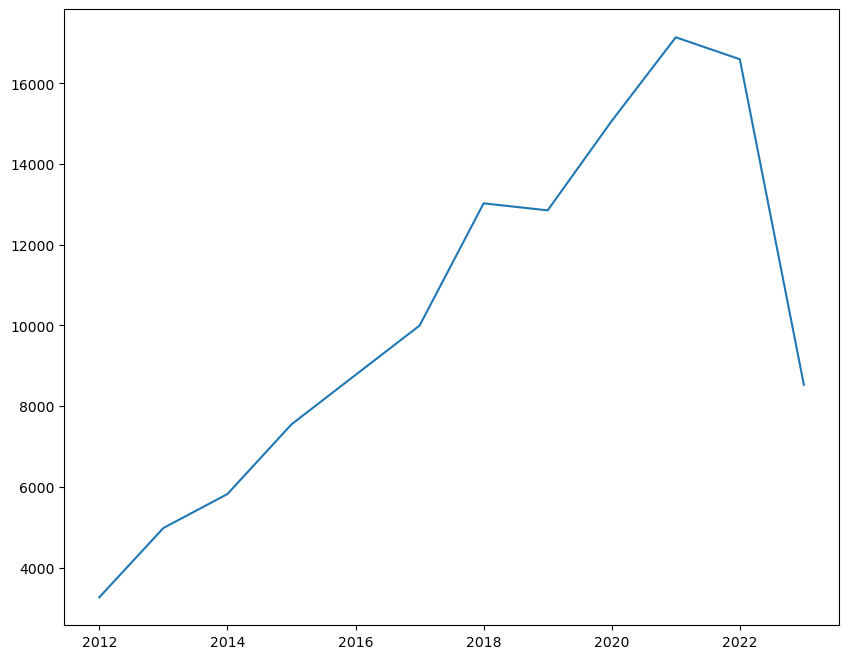

In [75]:
#plot every data point for each year
plt.figure(figsize=(10,8))
fdf3["year"].value_counts().sort_index().plot()
plt.show()

This is the graph that represents the total number of datapoints in my dataset. As we can see we have a lot of datapoints for the later years and not a lot of data for the earlier years. This may prove to be an issue as time goes on.


### Distribution of my continuous data

**Market Value distribution plots**

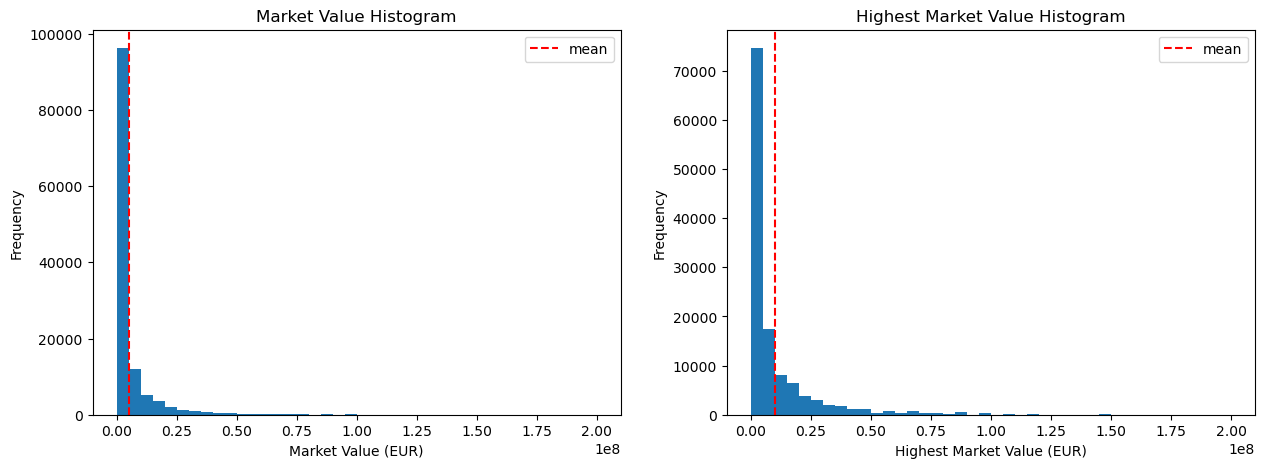

In [76]:

# make a subplot frame
plt.subplots(1,2, figsize=(15, 5))

#Market value
plt.subplot(1, 2, 1)
plt.hist(fdf3["market_value"], bins=40)
plt.axvline(fdf3["market_value"].mean(), color="red", linestyle="--", label="mean")
plt.xlabel("Market Value (EUR)")
plt.ylabel("Frequency")
plt.title("Market Value Histogram")
plt.legend()

#Highest market value
plt.subplot(1, 2, 2)
plt.hist(fdf3["highest_ever_market_value"], bins=40)
plt.axvline(fdf3["highest_ever_market_value"].mean(), color="red", linestyle="--", label="mean")
plt.xlabel("Highest Market Value (EUR)")
plt.ylabel("Frequency")
plt.title("Highest Market Value Histogram")
plt.legend()

plt.show()


* First plot represents the constantly changing market value column in my dataset
* Second plot represents the peak of a players value across the entirety of the 2012-2023 timespan of my data

**Physical Attributes**

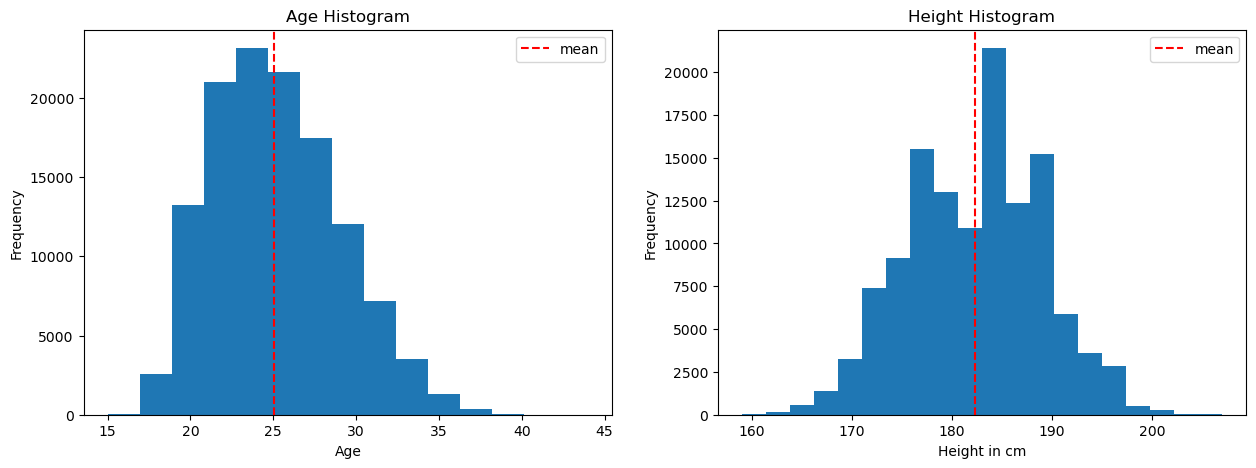

In [77]:
# make a subplot frame
plt.subplots(1,2, figsize=(15, 5))

#Age
plt.subplot(1, 2, 1)
plt.hist(fdf3["age"], bins=15)
plt.axvline(fdf3["age"].mean(), color="red", linestyle="--", label="mean")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Histogram")
plt.legend()

#Height
plt.subplot(1,2,2)
plt.hist(fdf3["height_in_cm"],bins=20)
plt.axvline(fdf3["height_in_cm"].mean(),color="red",linestyle="--",label="mean")
plt.xlabel("Height in cm")
plt.ylabel("Frequency")
plt.title("Height Histogram")
plt.legend()



* In my age histogram the mean sits at almost exactly 25 indicating that thats the average footballer age in my dataset. It takes a normally distributed shape with a slightly right skew which deos make logical sense as football players are more often "young" then they are "old".
* My height histogram also loosely follows that normally distributed shape except that the mode falls very far from the mean. It looks ever so slightly left skewed. The mean seems to sit at the 180-185 height range suggesting that that is the average height of a footballer.

**Yearly Player stats**

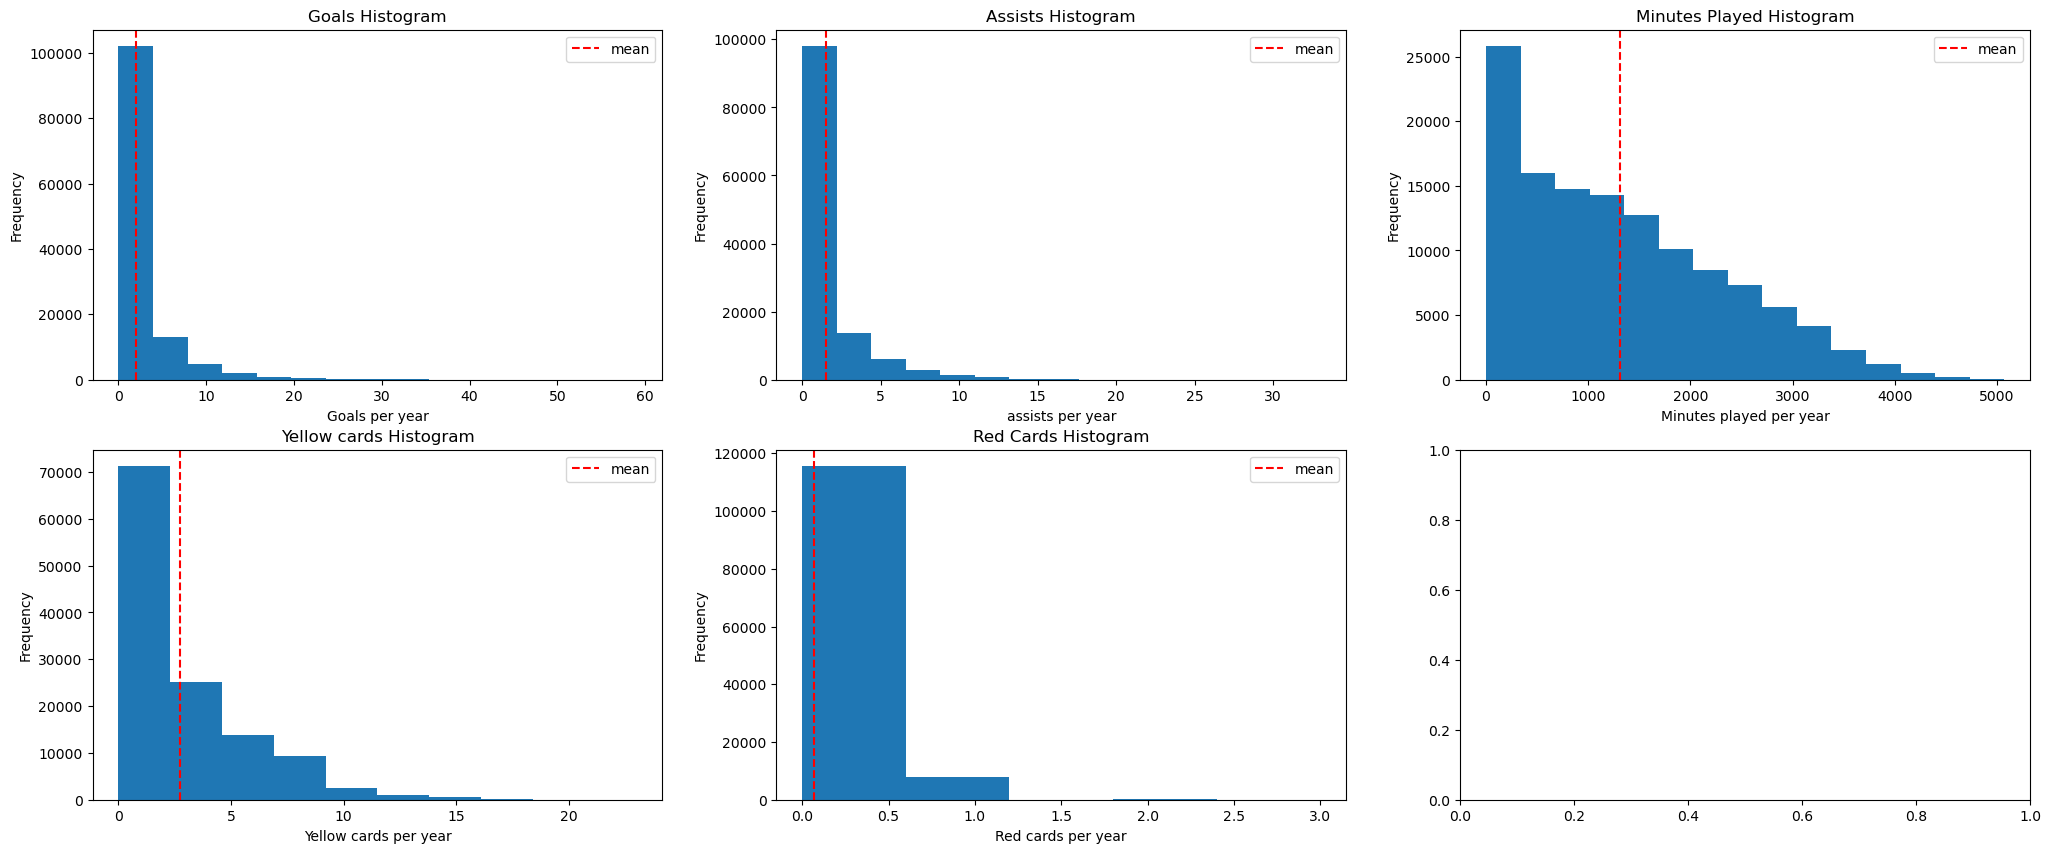

In [78]:
# make a subplot frame
plt.subplots(2,3, figsize=(25, 10))

#goals
plt.subplot(2, 3, 1)
plt.hist(fdf3["goals"], bins=15)
plt.axvline(fdf3["goals"].mean(), color="red", linestyle="--", label="mean")
plt.xlabel("Goals per year")
plt.ylabel("Frequency")
plt.title("Goals Histogram")
plt.legend()

#assists
plt.subplot(2,3,2)
plt.hist(fdf3["assists"],bins=15)
plt.axvline(fdf3["assists"].mean(),color="red",linestyle="--",label="mean")
plt.xlabel("assists per year")
plt.ylabel("Frequency")
plt.title("Assists Histogram")
plt.legend()

#minutes played
plt.subplot(2,3,3)
plt.hist(fdf3["minutes_played"],bins=15)
plt.axvline(fdf3["minutes_played"].mean(),color="red",linestyle="--",label="mean")
plt.xlabel("Minutes played per year")
plt.ylabel("Frequency")
plt.title("Minutes Played Histogram")
plt.legend()

#yellow cards
plt.subplot(2,3,4)
plt.hist(fdf3["yellow_cards"],bins=10)
plt.axvline(fdf3["yellow_cards"].mean(),color="red",linestyle="--",label="mean")
plt.xlabel("Yellow cards per year")
plt.ylabel("Frequency")
plt.title("Yellow cards Histogram")
plt.legend()

#red cards
plt.subplot(2,3,5)
plt.hist(fdf3["red_cards"],bins=5)
plt.axvline(fdf3["red_cards"].mean(),color="red",linestyle="--",label="mean")
plt.xlabel("Red cards per year")
plt.ylabel("Frequency")
plt.title("Red Cards Histogram")
plt.legend()


We can make several observations from this subplot:


### discrete columns

`Nationalities`

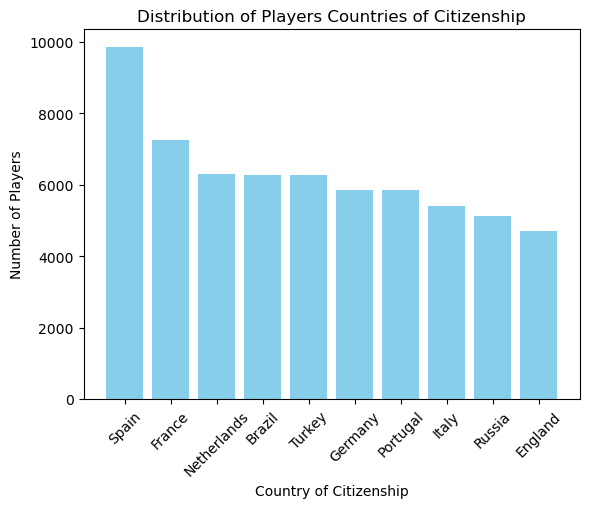

In [79]:

#group by country
country_counts = fdf3["country_of_citizenship"].value_counts()

#et the top 10
top_countries=country_counts.head(10)

#bar chart
plt.figure()
plt.bar(top_countries.index, top_countries.values, color="skyblue")
plt.title("Distribution of Players Countries of Citizenship")
plt.xlabel("Country of Citizenship")
plt.ylabel("Number of Players")
plt.xticks(rotation=45)
plt.show()


* The top 3 countries with the most player entries are Spain, France and Brazil which makes sense. They are all very popular footballing nations.
* There are a few surprises in this list.
* England is suprisingly low down on the list.
* Turkey and Russia are suprisingly high up on the list.

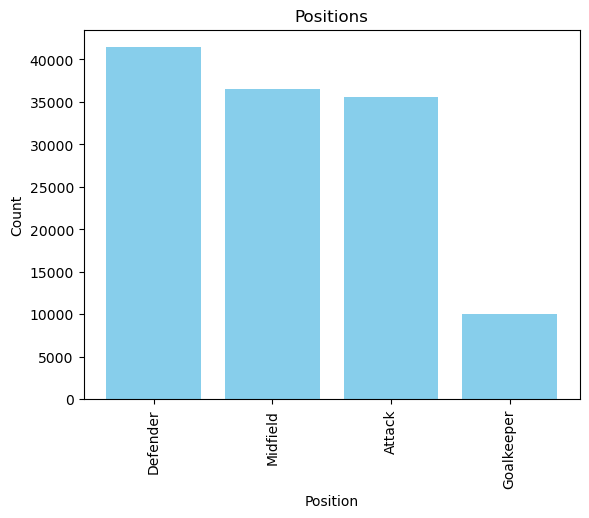

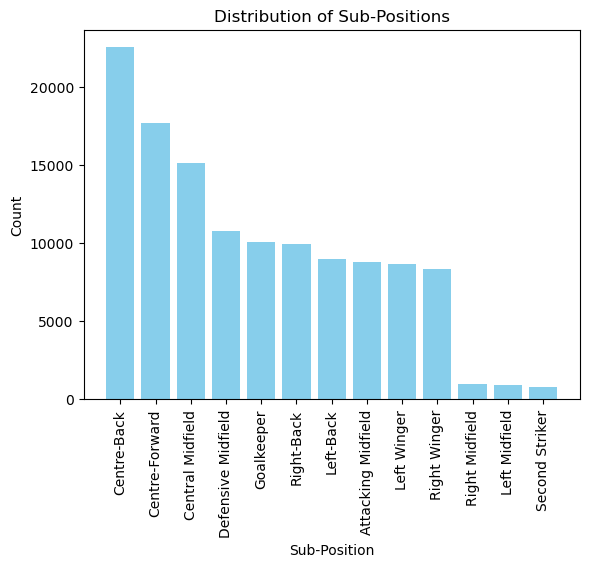

In [80]:
# Distribution of Sub-Positions

plt.figure()
plt.bar(fdf3["position"].value_counts().index, fdf3["position"].value_counts(),color="skyblue")
plt.title("Positions")
plt.xlabel("Position")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


# Distribution of Positions
plt.figure()
plt.bar(fdf3["sub_position"].value_counts().index, fdf3["sub_position"].value_counts(),color="skyblue")
plt.title("Distribution of Sub-Positions")
plt.xlabel("Sub-Position")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()



`Position`
* Defenders are the most populous position in my dataset accounting for over 40000 entries.
* Midfielders and Attackers are very close behind defenders but fall just short.
* Goalkeepers have by far the least amount of entries in my dataset and it makes sense as teams usually only have 2-3 goalkeepers in the squad at any given time.

`Subposition`
* We can use the subposition collumn to really go into detail with this.
* Centre-backs, Centre-Forwards and Central midfielders lead here by a decent margin with Centrebacks being extremely common.
* Right and Left midfielders aswell as Second Strikers are very rare sub position for playrs and hence dont have many entries.

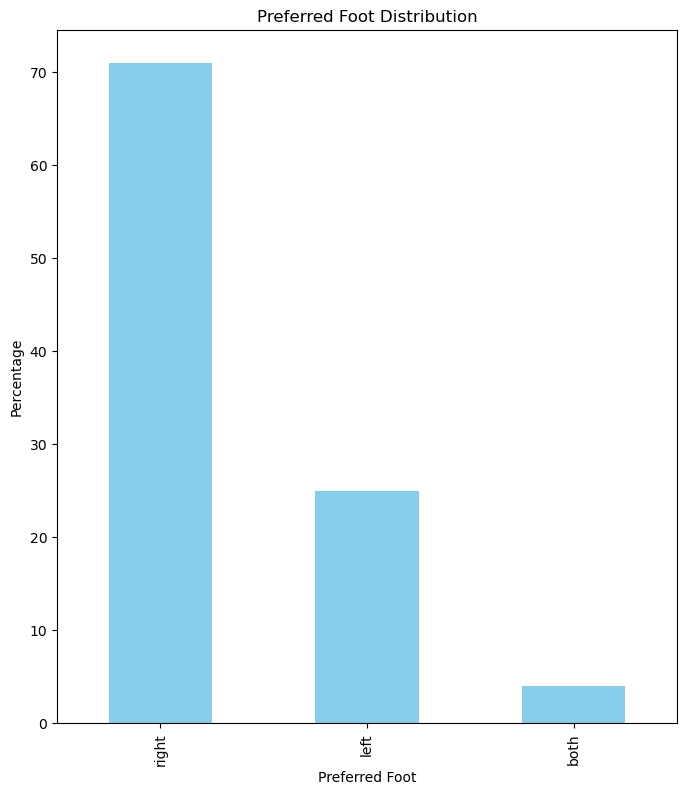

In [81]:

#set a values count for strong foot and calculate percentage
foot_counts = fdf3["foot"].value_counts()
foot_percentage = (foot_counts / foot_counts.sum()) * 100

#plot
plt.figure(figsize=(8, 9))
foot_percentage.plot(kind="bar", color="skyblue")
plt.title("Preferred Foot Distribution")
plt.xlabel("Preferred Foot")
plt.ylabel("Percentage")

plt.show()


`preferred foot`
* Right foot holds the majority of the entries in the dataset with almost 71% of players being dominantly right footed.
* Left foot on the other hand represents just above 25% of the entries in the dataset.
* Ambidextrous players are far and few between in my dataset accounting for only about 5%

### bivariate analysis

#### Exploring correlation

In [82]:
#take an initial look into correlations
fdf3.corr()

C:\Users\moham\AppData\Local\Temp\ipykernel_22028\1952811315.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fdf3.corr()


,player_id,last_season_x,most_recent_club_id,height_in_cm,market_value,highest_ever_market_value,age,contract_days_left,month,year,goals,assists,yellow_cards,red_cards,minutes_played,player_club_id,net_transfer_record,national_team_players
player_id,1.000000,0.251636,0.043355,-0.035371,-0.046203,-0.068817,-0.592429,0.368863,0.102530,0.486886,-0.105584,-0.118354,-0.156473,-0.034648,-0.257558,0.091113,0.043600,-0.059068
last_season_x,0.251636,1.000000,0.003195,0.059551,0.206857,0.259766,-0.024892,0.478757,0.072667,0.449494,0.133198,0.153772,0.139445,0.027477,0.248652,0.003242,-0.029177,0.239866
most_recent_club_id,0.043355,0.003195,1.000000,-0.028108,-0.117608,-0.143922,0.025936,-0.100343,0.023274,0.024629,-0.069867,-0.077205,-0.041918,-0.012439,-0.100307,0.587460,0.016508,-0.207922
height_in_cm,-0.035371,0.059551,-0.028108,1.000000,-0.011002,-0.012838,0.064005,0.044763,0.017256,0.017718,-0.052096,-0.201918,-0.016304,0.031635,0.053278,-0.018071,-0.009115,0.018335
market_value,-0.046203,0.206857,-0.117608,-0.011002,1.000000,0.803066,0.029209,0.265207,0.037947,0.071306,0.435758,0.427006,0.244392,0.044559,0.438974,-0.111263,-0.181890,0.479880
highest_ever_market_value,-0.068817,0.259766,-0.143922,-0.012838,0.803066,1.000000,-0.022764,0.327589,0.003643,-0.003951,0.429326,0.422287,0.227419,0.040596,0.413370,-0.134203,-0.164448,0.503406
age,-0.592429,-0.024892,0.025936,0.064005,0.029209,-0.022764,1.000000,-0.273547,0.065201,0.216577,0.074871,0.063046,0.158564,0.044451,0.229824,0.042501,-0.044448,0.006827
contract_days_left,0.368863,0.478757,-0.100343,0.044763,0.265207,0.327589,-0.273547,1.000000,0.050353,0.304384,0.123098,0.132870,0.081035,0.017057,0.169269,-0.061392,-0.002595,0.231080
month,0.102530,0.072667,0.023274,0.017256,0.037947,0.003643,0.065201,0.050353,1.000000,0.147809,-0.011212,-0.016124,-0.016383,-0.009827,-0.026512,0.030754,0.004673,0.010792
year,0.486886,0.449494,0.024629,0.017718,0.071306,-0.003951,0.216577,0.304384,0.147809,1.000000,-0.031355,-0.035153,-0.035984,-0.010681,-0.051746,0.099672,-0.004505,0.041329


I"ll now be setting up a heatmap of my correlations to get a better visual of how my collumns look against each other.

C:\Users\moham\AppData\Local\Temp\ipykernel_22028\3884037646.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(fdf3.corr(), dtype=bool))
C:\Users\moham\AppData\Local\Temp\ipykernel_22028\3884037646.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(fdf3.corr(), annot=True, cmap="coolwarm", center=0, vmin=-1, vmax=1,mask=mask)


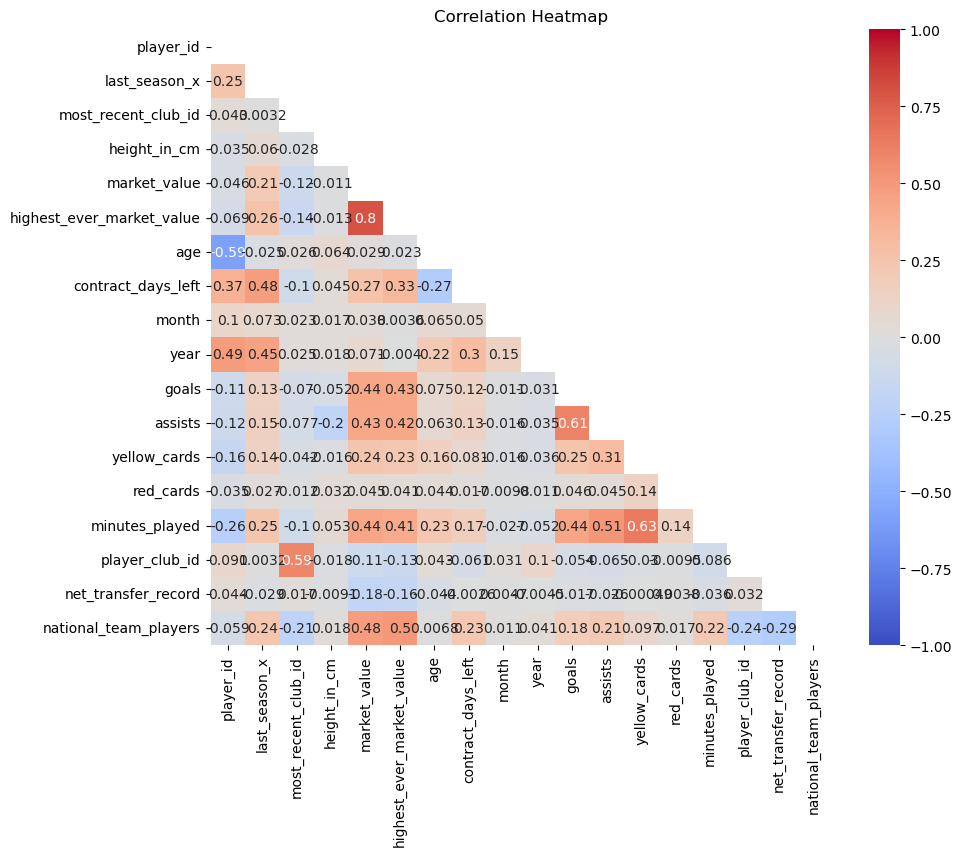

In [83]:
#create the heatmap and customize the heatmap
mask = np.triu(np.ones_like(fdf3.corr(), dtype=bool))
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(fdf3.corr(), annot=True, cmap="coolwarm", center=0, vmin=-1, vmax=1,mask=mask)
heatmap.set_title("Correlation Heatmap")

plt.show()

##### Correlation Analysis

1. **Player Age vs. Player ID**: There"s a moderate negative correlation at -0.59. Younger players tend to have higher player IDs, indicating that player IDs are assigned sequentially or chronologically.

2. **Player Age vs. Last Season**: The correlation between age and the last season played is slightly positive at 0.02. This suggests that player age and the last season are weakly related, with age potentially increasing slightly over seasons.

3. **Player Age vs. Contract Days Left**: Age has a negative correlation at -0.27 with the number of days left in the player"s contract. Younger players tend to have more time remaining in their contracts.

4. **Year vs. Player ID**: There"s a positive correlation at 0.49 between the year and player ID. This indicates that player IDs may increase over the years, possibly due to new players joining the dataset each year.

5. **Goals vs. Assists**: The number of goals and assists have a strong positive correlation at 0.61, which makes sense since players with more goals often have more assists.

6. **Yellow Cards vs. Red Cards**: Yellow card count and red card count are positively correlated at 0.14. This means that players who receive more yellow cards are also more likely to receive red cards.

7. **Goals vs. Minutes Played**: Goals and minutes played are positively correlated at 0.45, suggesting that players who spend more time on the field tend to score more goals.

8. **Assists vs. Minutes Played**: There"s a positive correlation at 0.52 between assists and minutes played. Players with more playing time tend to provide more assists.

9. **Yellow Cards vs. Minutes Played**: Yellow cards are weakly correlated with minutes played at 0.14. Players with more playing time might accumulate more yellow cards.



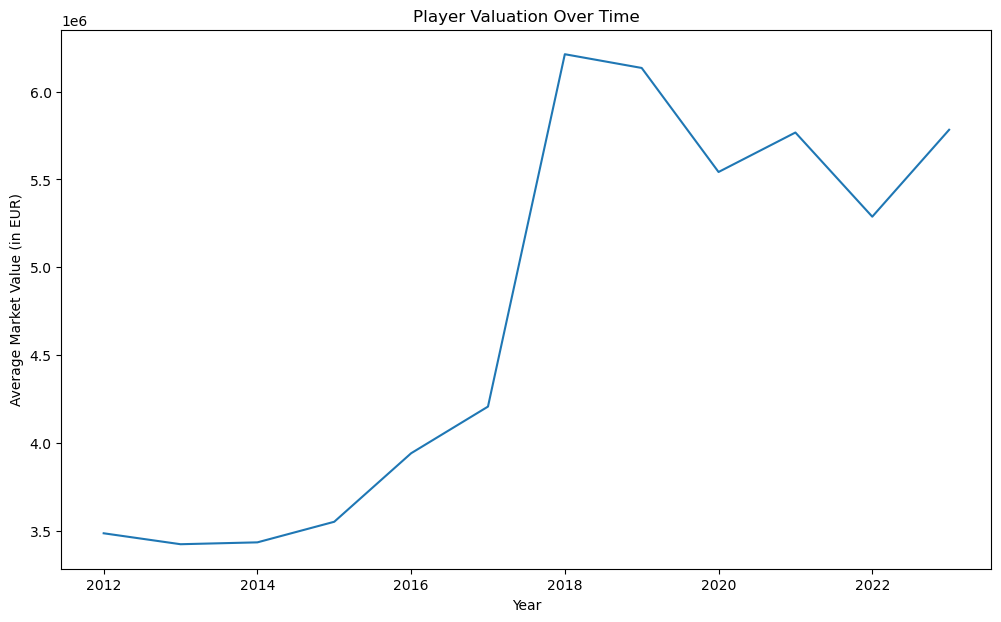

In [84]:
#group market value by year and get average
market_value_by_year = fdf3.groupby("year")["market_value"].mean()

#plot
plt.figure(figsize=(12, 7))
plt.plot(market_value_by_year.index, market_value_by_year.values, linestyle="-")
plt.title("Player Valuation Over Time")
plt.xlabel("Year")
plt.ylabel("Average Market Value (in EUR)")
plt.show()


`Average Player Valuations over time`
* There seemed to be a general inflation of Average Player valuations over time in the earlier years with a massive spike between 2015 and 2018 where the average player valuation almost doubled.
* There seems to have been a slight decrease since then which could be attributed to the Covid-19 pandemic in 2020 which the market has just begun to recover from.
* Perhaps there are underlying reasons for this fluctuating valuations throughout the years.

In [85]:
fdf3.groupby("sub_position")["market_value"].mean().sort_values(ascending=False)


sub_position
Second Striker        9.922778e+06
Left Winger           6.440925e+06
Central Midfield      5.942889e+06
Attacking Midfield    5.848678e+06
Centre-Forward        5.836774e+06
Right Winger          5.657970e+06
Defensive Midfield    4.933177e+06
Centre-Back           4.767350e+06
Left-Back             3.856758e+06
Right-Back            3.750302e+06
Right Midfield        3.730579e+06
Left Midfield         3.714939e+06
Goalkeeper            3.567448e+06
Name: market_value, dtype: float64

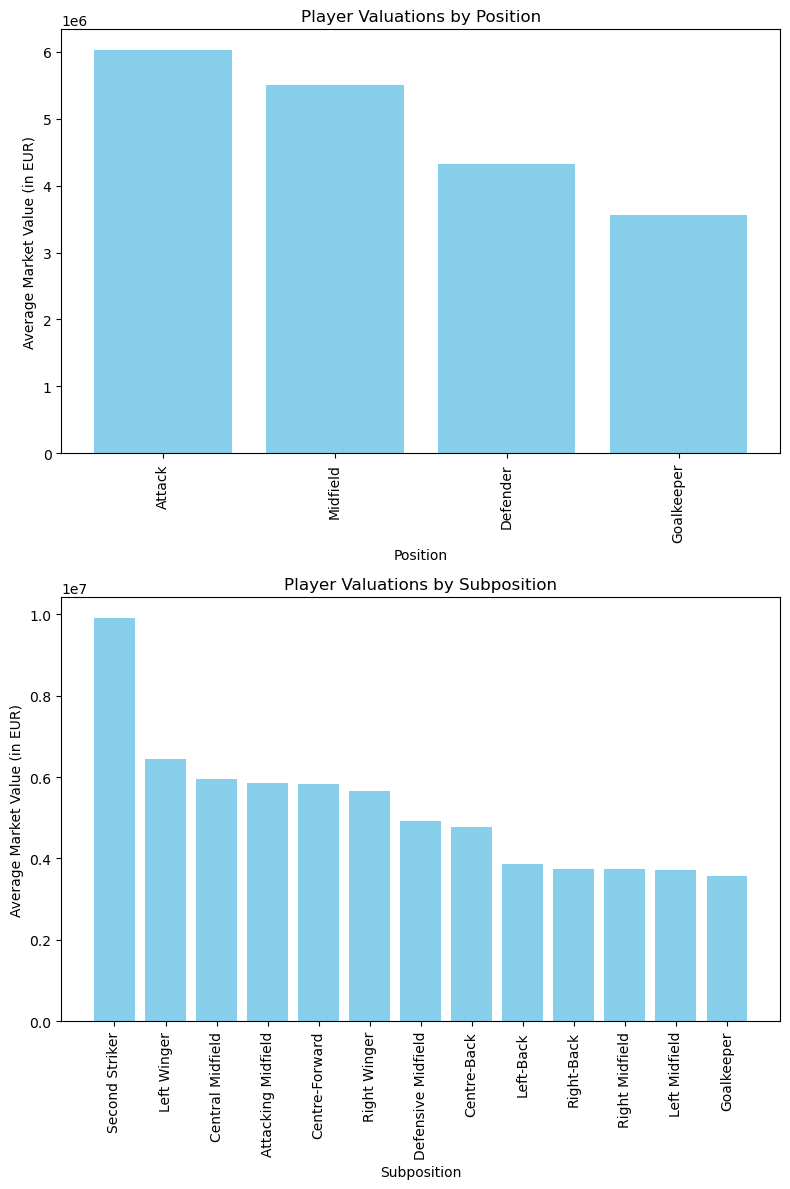

In [86]:
#group by position and subposition
position_market_value = fdf3.groupby("position")["market_value"].mean().sort_values(ascending=False)
subposition_market_value = fdf3.groupby("sub_position")["market_value"].mean().sort_values(ascending=False)

#make subplot
plt.subplots(2, 1, figsize=(8, 12))

#plot position
plt.subplot(2,1, 1)
plt.bar(position_market_value.index, position_market_value.values,color="skyblue")
plt.title("Player Valuations by Position") 
plt.xlabel("Position")
plt.ylabel("Average Market Value (in EUR)")
plt.xticks(rotation=90)

#plot subpositions
plt.subplot(2,1, 2)
plt.bar(subposition_market_value.index, subposition_market_value.values,color="skyblue")
plt.title("Player Valuations by Subposition") 
plt.xlabel("Subposition")
plt.ylabel("Average Market Value (in EUR)")
plt.xticks(rotation=90)

#display the subplots
plt.tight_layout()


`Player Valuations by Positions and Subpositions` <br>

`Position`
* attackers and midfielders generally are valued the highest at around 5-6 million (EUR)
* defenders are valued slightly lower at around 4.5 million (EUR)
* goalkeepers are valued the lowest at around 3.75 million (EUR)

`Subposition`
* There seems to be a lot of variation in valuations of players based on their subposition
* for example Second Striker is valued at almost 10 million and goalkeepers at around 3-4 million.
* The attacking roles seem to generally be more valuable than the defensive roles with 4 of the bottom 5 least valuable positions being defensive ones.

In [87]:
#turn my dataset into a  to load into the next notebook
fdf3.to_csv('csvs/my_dataset.csv', index=False)